In [ ]:
!pip install -U scikit-fuzzy

In [ ]:
import skfuzzy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
data = pd.read_csv('data1.csv')
x = data[['X', 'Y']].values
print(data.head())
class_var = data['Class']
print(x.shape)

      X     Y  Class
0   5.5   7.0      1
1   9.4  13.0      1
2   6.0   6.8      1
3  12.5  13.0      0
4   5.5   5.6      1
(212, 2)


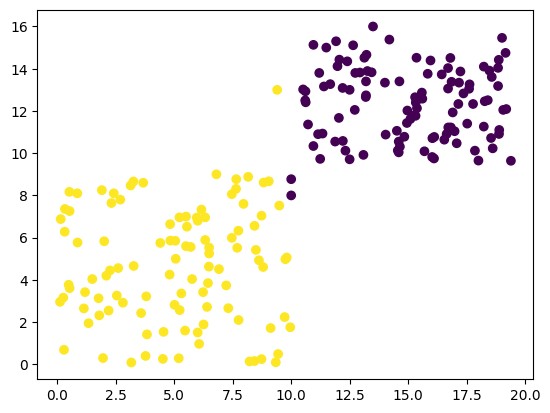

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=class_var)

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
print(x.shape, type(x))

(212, 2) <class 'numpy.ndarray'>


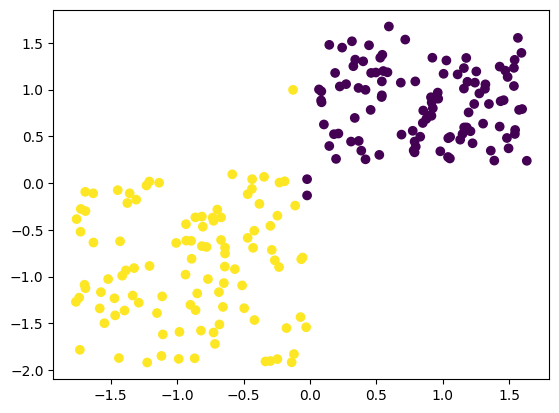

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=class_var)

In [ ]:
results = []

for num_clusters in range(2, 11):
    cntr, u, u0, d, jm, p, fpc = skfuzzy.cluster.cmeans(x.T, num_clusters, 2, error=0.005, maxiter=1000, init=None)
    cluster_membership = np.argmax(u, axis=0)

    results.append({
        'num_clusters': num_clusters,
        'cntr': cntr,
        'u': u,
        'u0': u0,
        'd': d,
        'jm': jm,
        'p': p,
        'fpc': fpc,
        'cluster_membership': cluster_membership
    })

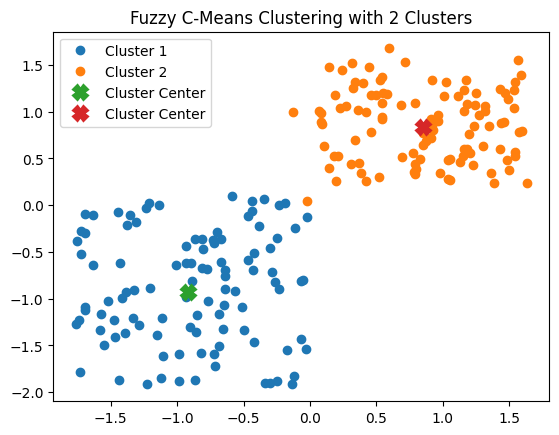

FPC for 2 clusters = 0.8687996755373979


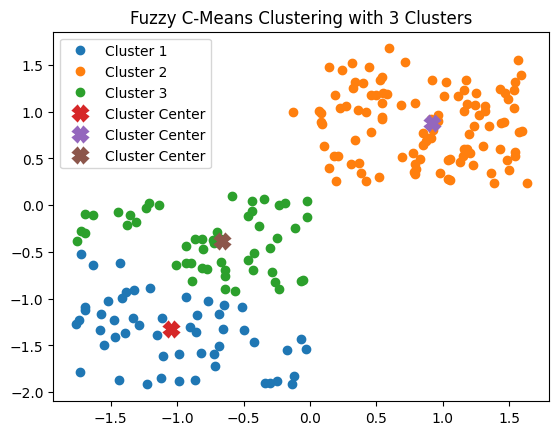

FPC for 3 clusters = 0.7328253856657886


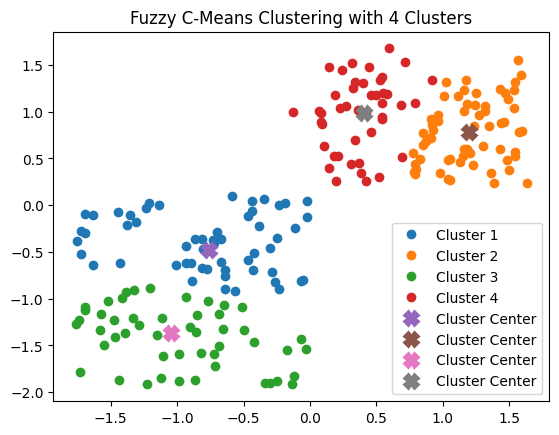

FPC for 4 clusters = 0.6475583013555231


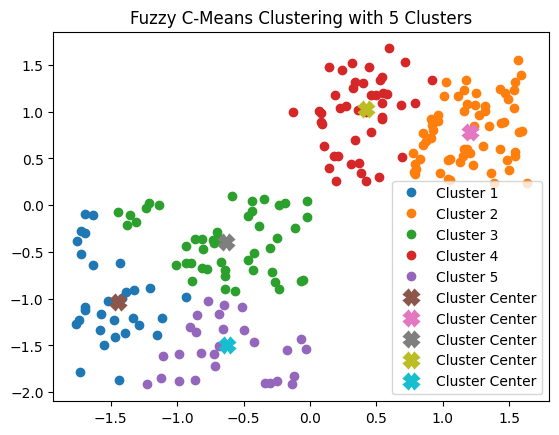

FPC for 5 clusters = 0.617384953751211


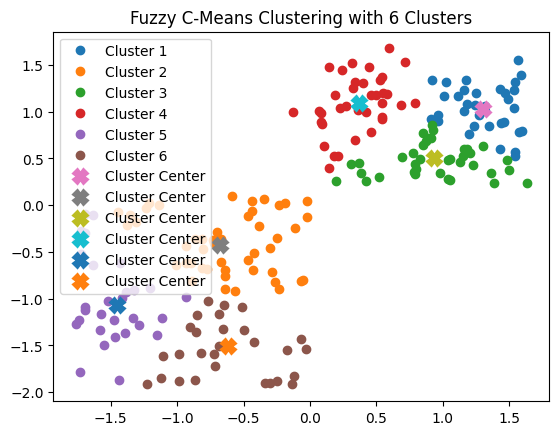

FPC for 6 clusters = 0.5867579756666952


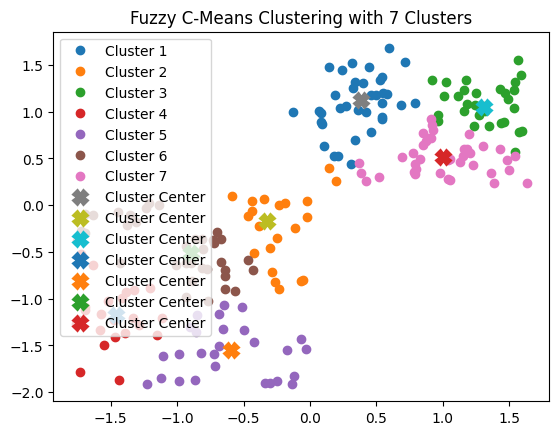

FPC for 7 clusters = 0.5646434272345949


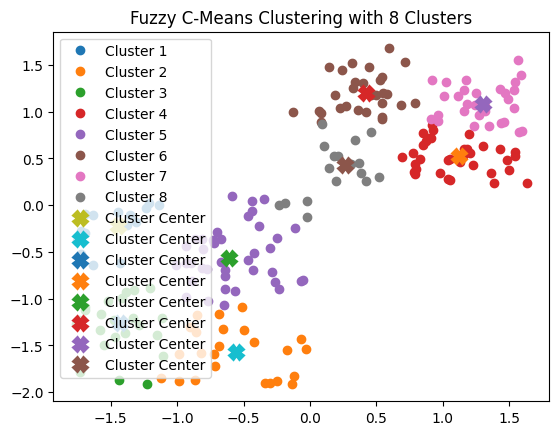

FPC for 8 clusters = 0.5643522344307111


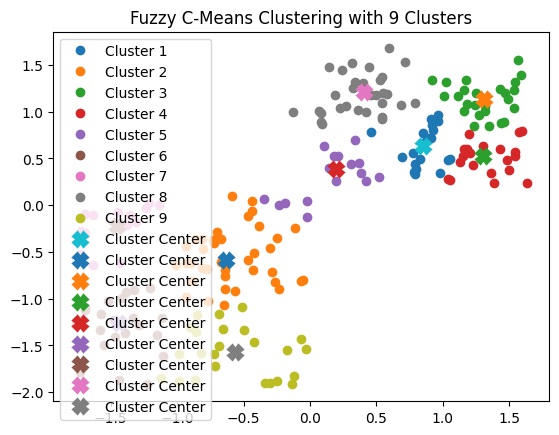

FPC for 9 clusters = 0.5396660883776255


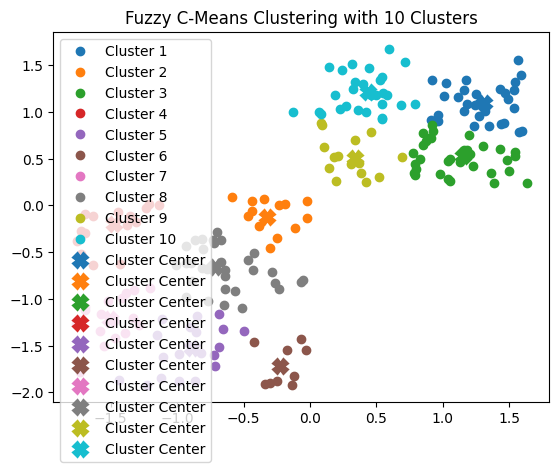

FPC for 10 clusters = 0.5459193048866122


In [ ]:
for result in results:
    fig, ax = plt.subplots()

    num_clusters = result['num_clusters']
    cntr = result['cntr']
    cluster_membership = result['cluster_membership']

    for i in range(num_clusters):
        ax.plot(x[cluster_membership == i, 0], x[cluster_membership == i, 1], 'o', label=f'Cluster {i + 1}')

    for cluster_center in cntr:
        ax.plot(cluster_center[0], cluster_center[1], 'X', markersize=10, markeredgewidth=2, label='Cluster Center')

    ax.set_title(f'Fuzzy C-Means Clustering with {num_clusters} Clusters')
    ax.legend()
    plt.show()

    print(f'FPC for {num_clusters} clusters = {result["fpc"]}')

In [ ]:
best_result = max(results, key=lambda x: x['fpc'])

print(f"The best number of clusters is {best_result['num_clusters']} with an FPC of {best_result['fpc']}")

The best number of clusters is 2 with an FPC of 0.8687996755373979


# **Data2**

In [ ]:
data = pd.read_csv('data2.csv')
x = data[['X', 'Y']].values
print(data.head())
class_var = data['Class']
print(x.shape)

          X         Y  Class
0 -0.842046  0.408155      0
1  0.096394 -0.852114      1
2 -0.964828  0.034454      0
3 -0.164699  0.817332      1
4  0.274231  0.756343      1
(300, 2)


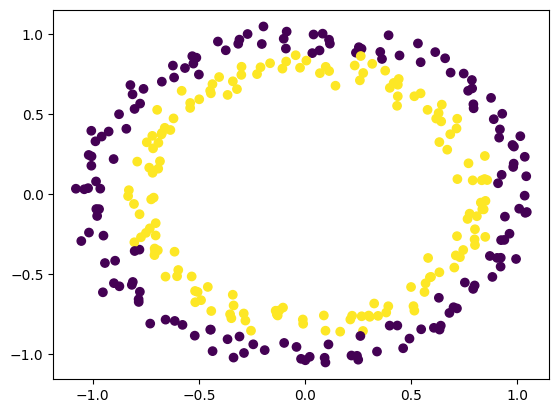

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=class_var)

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
print(x.shape, type(x))

(300, 2) <class 'numpy.ndarray'>


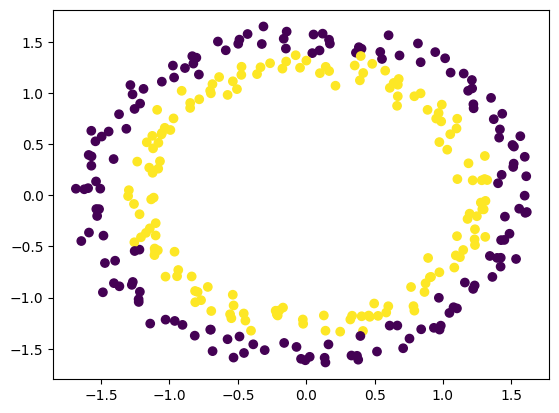

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=class_var)

In [ ]:
results = []

for num_clusters in range(2, 11):
    cntr, u, u0, d, jm, p, fpc = skfuzzy.cluster.cmeans(x.T, num_clusters, 2, error=0.005, maxiter=1000, init=None)
    cluster_membership = np.argmax(u, axis=0)

    results.append({
        'num_clusters': num_clusters,
        'cntr': cntr,
        'u': u,
        'u0': u0,
        'd': d,
        'jm': jm,
        'p': p,
        'fpc': fpc,
        'cluster_membership': cluster_membership
    })

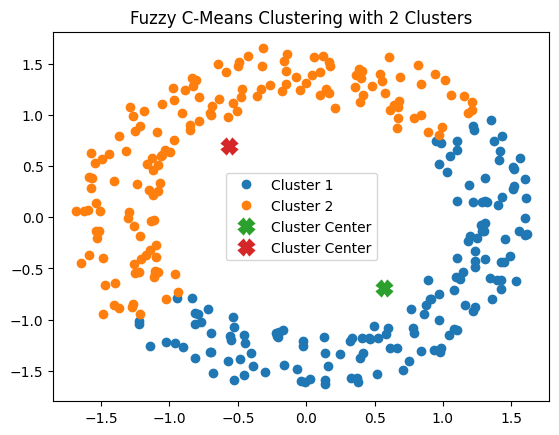

FPC for 2 clusters = 0.7064043129033847


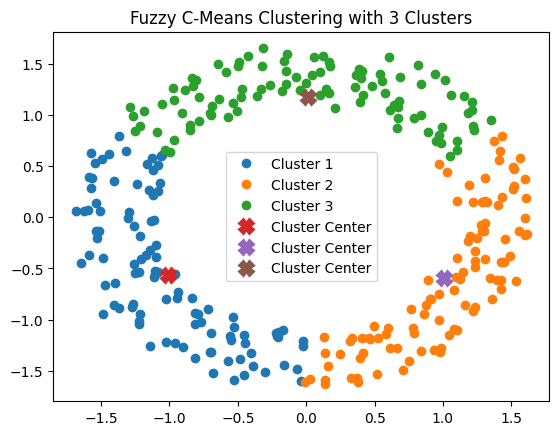

FPC for 3 clusters = 0.6774045236241547


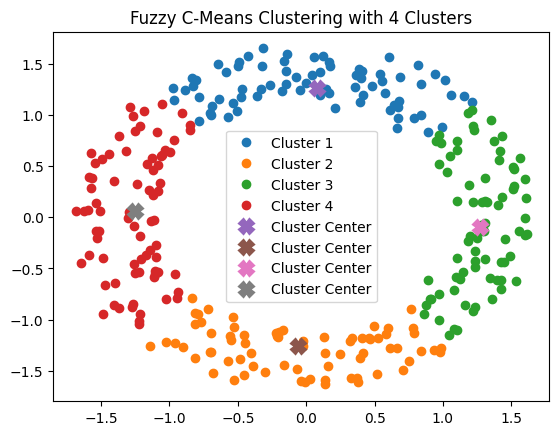

FPC for 4 clusters = 0.6602044886264999


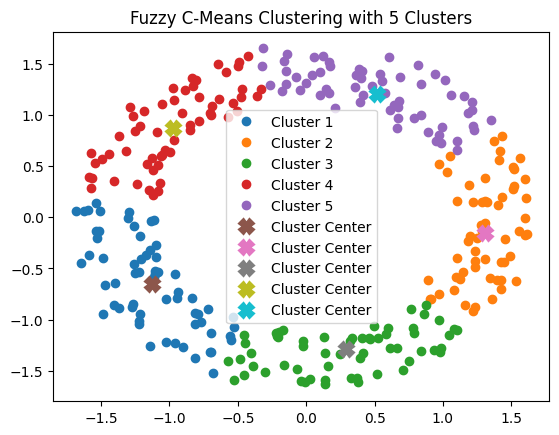

FPC for 5 clusters = 0.6500658590600079


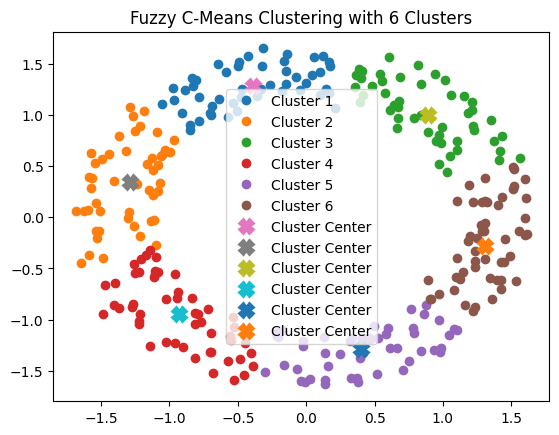

FPC for 6 clusters = 0.632185164639572


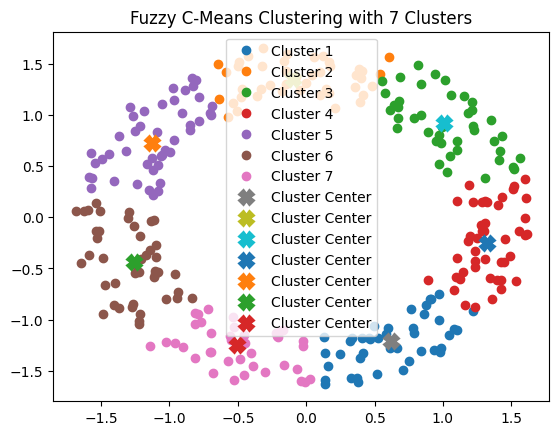

FPC for 7 clusters = 0.6230343152048153


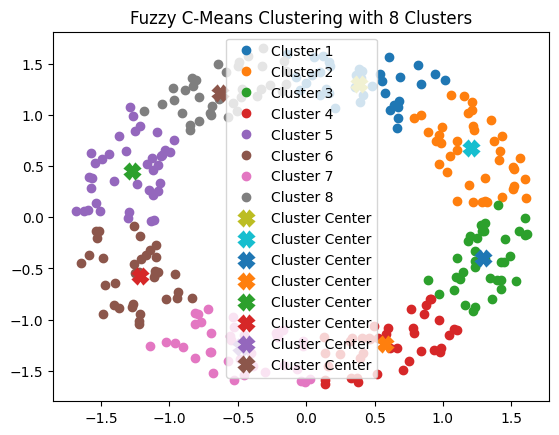

FPC for 8 clusters = 0.611767302637752


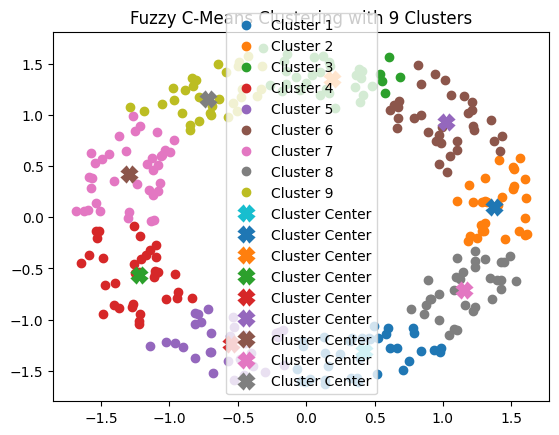

FPC for 9 clusters = 0.595516839963413


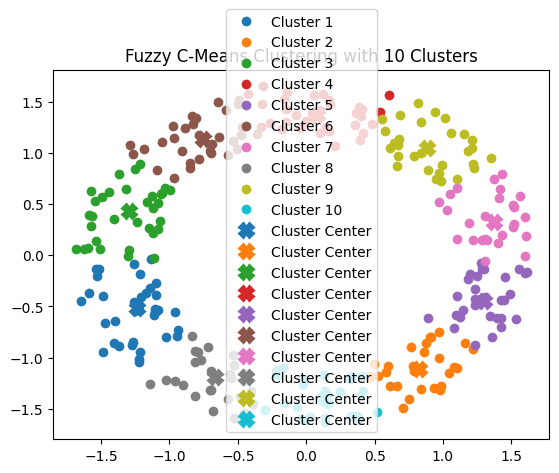

FPC for 10 clusters = 0.5747814269231124


In [ ]:
for result in results:
    fig, ax = plt.subplots()

    num_clusters = result['num_clusters']
    cntr = result['cntr']
    cluster_membership = result['cluster_membership']

    for i in range(num_clusters):
        ax.plot(x[cluster_membership == i, 0], x[cluster_membership == i, 1], 'o', label=f'Cluster {i + 1}')

    for cluster_center in cntr:
        ax.plot(cluster_center[0], cluster_center[1], 'X', markersize=10, markeredgewidth=2, label='Cluster Center')

    ax.set_title(f'Fuzzy C-Means Clustering with {num_clusters} Clusters')
    ax.legend()
    plt.show()

    print(f'FPC for {num_clusters} clusters = {result["fpc"]}')

In [ ]:
best_result = max(results, key=lambda x: x['fpc'])

print(f"The best number of clusters is {best_result['num_clusters']} with an FPC of {best_result['fpc']}")

The best number of clusters is 2 with an FPC of 0.7064043129033847
